In [4]:
# If you're using Google Colab, please run these commands first
# !wget https://github.com/dvgodoy/PyTorch101_AI_Plus/raw/main/quiz.zip
# !unzip -qo quiz.zip
# !mkdir plots
# !wget https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/plots/chapter0.py -O ./plots/chapter0.py

In [5]:
from IPython.display import display, HTML
display(HTML("""<style>.container { width:90% !important; }.text_cell_render, .output_text {font-family: Lato;font-size: 18px;line-height: 1.5;}.CodeMirror {font-size: 16px;}</style>"""))
from quiz.jupyterquiz import display_quiz

# Module 2

In [1]:
import numpy as np
from plots.chapter0 import *

In [2]:
%run -i simple_linear_regression.py

## Gradient Descent in 5 easy steps!

Gradient descent is the most common **optimization algorithm** in Machine Learning and Deep Learning.

The purpose of using gradient descent is **to minimize the loss**, that is, **minimize the errors between predictions and actual values** (and sometimes some other term as well).

It goes beyond the scope of this tutorial to fully explain how gradient descent works, but I'll cover the **five basic steps** you'd need to go through to compute it, namely:

- Step 0: Random initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Rinse and repeat!

---

If you want to learn more about gradient descent, check the following resources:
- [**Linear Regression Simulator**](https://www.mladdict.com/linear-regression-simulator), which goes through the very same steps listed here
- [**A Visual and Interactive Guide to the Basics of Neural Networks**](http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/)
- [**Gradient Descent Algorithms and Its Variants**](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3)

---

### Step 0: Initialization

Technically, this step is not part of gradient descent, but it is an important step nonetheless.

For training a model, you need to **randomly initialize the parameters/weights** (we have only two, **b** and **w**).

Make sure to *always initialize your random seed* to ensure **reproducibility** of your results. As usual, the random seed is [42](https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy#Answer_to_the_Ultimate_Question_of_Life,_the_Universe,_and_Everything_(42)), the *least random* of all random seeds one could possibly choose :-)

**BTW: we are back to Numpy for a little while!**

In [3]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


### Step 1: Compute Model's Predictions

This is the **forward pass** - it simply *computes the model's predictions using the current values of the parameters/weights*. At the very beginning, we will be producing really bad predictions, as we started with random values from Step 0.

In [4]:
# Computes our model's predicted output
yhat = b + w * x_train

### Step 2: Compute Loss

There is a subtle but fundamental difference between **error** and **loss**. 

The **error** is the difference between **actual** and **predicted** computed for a single data point.

$$
\Large \text{error}_i = \hat{y_i} - y_i
$$

The **loss**, on the other hand, is some sort of **aggregation of errors for a set of data points**.

For a regression problem, the **loss** is given by the **Mean Squared Error (MSE)**, that is, the average of all squared differences between **actual values** (y) and **predictions** (b + wx).

$$
\large \text{MSE} = \frac{1}{n} \sum_{i=1}^n{\text{error}_i}^2
$$

$$
\large \text{MSE} = \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
$$

$$
\large \text{MSE} = \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
$$

In [5]:
# How wrong is our model? That's the error! 
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


We've computed the loss using ALL data points in the training set, but it does not necessarily need to be like that...

#### Batch

It uses ***all data points*** to compute the partial derivatives and, therefore, its path towards the solution is stable, yet it is going to be ***very slow*** on large datasets.
 
#### Stochastic

It uses a ***single data point*** to compute the partial derivative and, because of it, it is ***very fast***, but its path towards the solution is going to be ***erratic*** and ***jumpy***.

#### Mini-Batch

It uses ***some data points*** to compute the partial derivative and it is a compromise between ***stability*** and ***speed***. Its size is a ***hyper-parameter*** on its own, although a value of 32 (and other powers of 2) are commonly used.

![](https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/gradient_descent.png)

### Loss Surface

We have just computed the **loss** (2.74) corresponding to our **randomly initialized parameters** (_b_ = 0.49 and _w_ = -0.13). What if we did the same for **ALL** possible values of *_b_* and *_w_*? Well, not _all_ possible values, but _all combinations of evenly spaced values in a given range_, like:

In [9]:
# Reminder:
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [10]:
bs, ws

(array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        ...,
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
        [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]]),
 array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.94, -0.94, -0.94, ..., -0.94, -0.94, -0.94],
        [-0.88, -0.88, -0.88, ..., -0.88, -0.88, -0.88],
        ...,
        [ 4.88,  4.88,  4.88, ...,  4.88,  4.88,  4.88],
        [ 4.94,  4.94,  4.94, ...,  4.94,  4.94,  4.94],
        [ 5.  ,  5.  ,  5.  , ...,  5.  ,  5.  ,  5.  ]]))

In [11]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
sample_yhat.shape

(101, 101)

In [12]:
all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train
)
all_predictions.shape

(80, 101, 101)

In [13]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [14]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [15]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

The result is a **grid of losses**, a matrix of shape (101, 101), **each loss** corresponding to a **different combination of the parameters _b_ and _w_**.

These losses are our **loss surface**, which can be visualized in a 3D plot, where the vertical axis (_z_) represents the loss values. If we **connect** the combinations of _b_ and _w_ that yield the **same loss value**, we'll get an **ellipse**. Then, we can draw this ellipse in the original _b_ x _w_ plane (in blue, for a loss value of 3). This is, in a nutshell, what a **contour plot** does. From now on, we'll always use the contour plot, instead of the corresponding 3D version.

(<Figure size 864x432 with 2 Axes>,
 (<Axes3DSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
  <AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>))

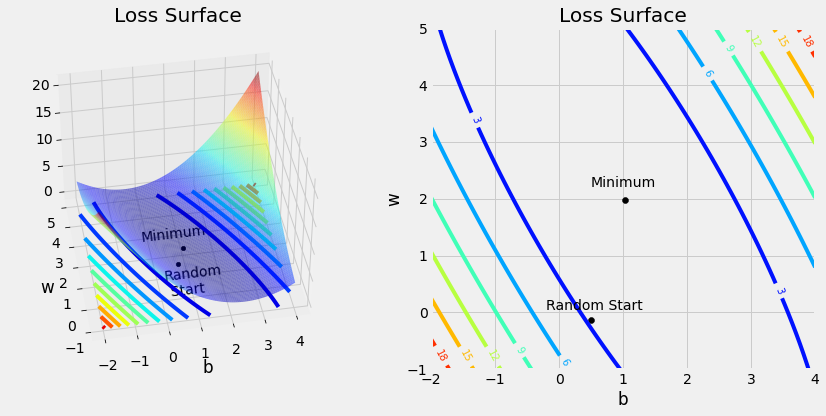

In [16]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)

This is one of the nice things about tackling a simple problem like a linear regression with a single feature: We have only **two parameters**, and thus **we can compute and visualize the loss surface**.

---

Unfortunately, for the absolute majority of problems, **computing the loss surface is not going to be feasible**: we have to rely on gradient descent's ability to reach a point of minimum, even if it starts at some random point.

---

### Cross Sections

Another nice thing is that we can cut a **cross-section** in the loss surface to check what the **loss** would look like if **the other parameter were held constant**. 

Let's start by making **_b_ = 0.52** (the value from `b_range` that is closest to our initial random value for _b_, 0.4967). We cut a cross-section _vertically_ (the red dashed line) on our loss surface (left plot), and we get the resulting plot on the right:

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
        <AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>],
       dtype=object))

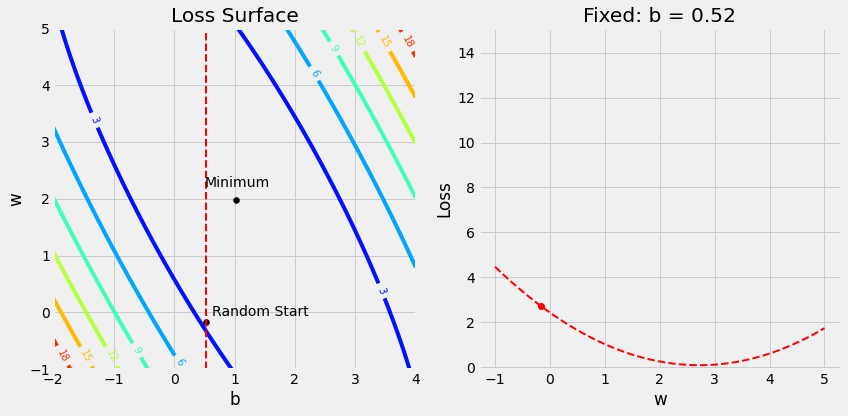

In [17]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

What does this cross-section tell us? It tells us that, **if we keep _b_ constant** (at 0.52), the **loss**, seen from the **perspective of parameter _w_**, can be minimized if **_w_ gets increased** (up to some value between 2 and 3). 

Sure, **different values of _b_** produce **different cross-section loss curves for _w_**. And those curves will depend on the **shape of the loss surface** (more on that later, in the "**Learning Rate**" section).

OK, so far, so good... What about the _other_ cross-section? Let's cut it _horizontally_ now, making **_w_ = -0.16** (the value from `w_range` that is closest to our initial random value for _b_, -0.1382). The resulting plot is on the right:

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss Surface'}, xlabel='b', ylabel='w'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

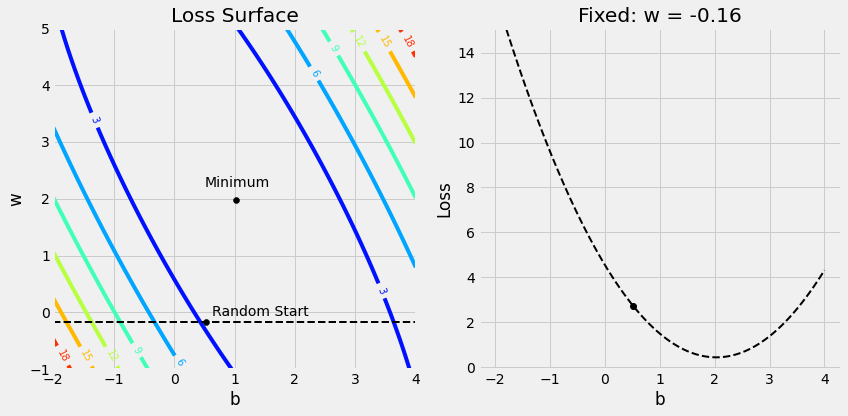

In [18]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

Now, **if we keep _w_ constant** (at -0.16), the **loss**, seen from the **perspective of parameter _b_**, can be minimized if **_b_ gets increased** (up to some value close to 2).

---

In general, the purpose of this cross-section is to get the **effect on the loss** of **changing a single parameter**, while keeping **everything else constant**. This is, in a nutshell, a **gradient** :-)

---

Now I have a question for you: **Which** of the two dashed curves, _red_ (_w_ changes, _b_ is constant) or _black_ (_b_ changes, _w_ is constant) yields the **largest changes in loss** when we modify the changing parameter? 

### Step 3: Compute the Gradients

A **gradient** is a **partial derivative** — *why partial*? Because one computes it with respect to (w.r.t.) a **single parameter**. We have two parameters, **b** and **w**, so we must compute two partial derivatives.

A **derivative** tells you *how much* **a given quantity changes** when you *slightly* vary some **other quantity**. In our case, how much does our **MSE** **loss** change when we vary **each one of our two parameters**?

The *right-most* part of the equations below is what you usually see in implementations of gradient descent for a simple linear regression. In the **intermediate step**, I show you **all elements** that pop-up from the application of the [chain rule](https://en.wikipedia.org/wiki/Chain_rule), so you know how the final expression came to be.

---

<h3><i><b>Gradient = how much the LOSS changes if ONE parameter changes a little bit!</b></i></h3>

---

**Gradients**:

$$
\large \frac{\partial{\text{MSE}}}{\partial{b}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{b}} = \frac{1}{N} \sum_{i=1}^N{2(b + w x_i - y_i)} = 2 \frac{1}{N} \sum_{i=1}^N{(\hat{y_i} - y_i)}
$$ 

$$
\large \frac{\partial{\text{MSE}}}{\partial{w}} = \frac{\partial{\text{MSE}}}{\partial{\hat{y_i}}} \frac{\partial{\hat{y_i}}}{\partial{w}} = \frac{1}{N} \sum_{i=1}^N{2(b + w x_i - y_i) \cdot x_i} = 2 \frac{1}{N} \sum_{i=1}^N{x_i (\hat{y_i} - y_i)}
$$


In [19]:
# Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

Since the **gradient for _b_** is **larger** (in absolute value, 3.04) than the gradient for _w_ (in absolute value, 1.83), the answer for the question I posed you in the "**Cross-Sections**" section is: The **black** curve (_b_ changes, _w_ is constant) yields the largest changes in loss. 

let's first put both cross-section plots side-by-side, so we can more easily compare them. What is the **main difference** between them?

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

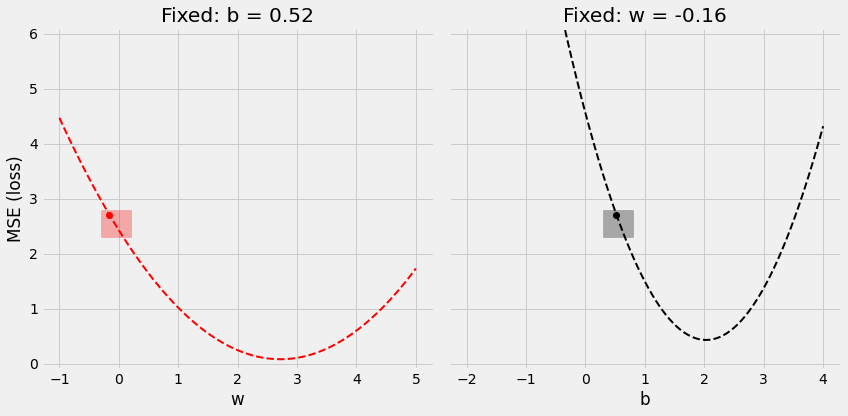

In [20]:
figure7(b, w, bs, ws, all_losses)

The curve on the right is **steeper**. That's your answer! **Steeper curves** have **larger gradients**.

Cool! That's the intuition... Now, let's get a bit more _geometrical_. So, I am **zooming in** on the regions given by the _red_ and _black_ squares of Figure 0.7.

From the "**Cross-Sections**" section, we already know that to _minimize the loss_ , both _b_ and _w_ needed to be **increased**. So, keeping in the spirit of using gradients, let's **increase each parameter a _little bit_** (always keeping the other one fixed!). By the way, in this example, _a little bit_ equals 0.12 (for convenience's sake, so it results in a nicer plot).

What effect do these increases have on the loss? Let's check it out:

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

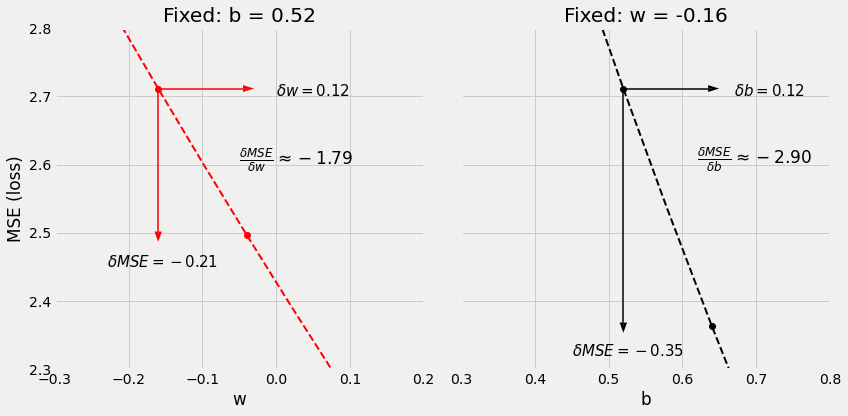

In [21]:
figure8(b, w, bs, ws, all_losses)

On the left plot, **increasing _w_ by 0.12** yields a **loss reduction of 0.21**. The geometrically computed and roughly approximate gradient is given by the ratio between the two values: **-1.79**. How does this result compare to the actual value of the gradient (-1.83)? It is actually not bad for a crude approximation.  Could it be better? Sure, if we make the **increase in _w_ smaller and smaller** (like 0.01, instead of 0.12), we'll get **better and better** approximations. In the limit, as the **increase approaches zero**, we'll arrive at the **precise value of the gradient**. Well, that's the definition of a derivative!

The same reasoning goes for the plot on the right: **increasing _b_ by the same 0.12** yields a **larger loss reduction of 0.35**. Larger loss reduction, larger ratio, larger gradient—and larger error, too, since the geometric approximation (-2.90) is farther away from the actual value (-3.04).

Time for another question: **Which curve**, red or black, do you like **best** to **reduce the loss**? It should be the **black one**, right? Well, yes, but it is not as straightforward as we'd like it to be. We'll dig deeper into this in the "**Learning Rate**" section.

### Step 4: Update the Parameters

In the final step, we **use the gradients to update** the parameters. Since we are trying to **minimize** our **losses**, we **reverse the sign** of the gradient for the update.

There is still another parameter to consider: the **learning rate**, denoted by the *Greek letter* **eta** (that looks like the letter **n**), which is the **multiplicative factor** that we need to apply to the gradient for the parameter update.

**Parameters**:

$$
\large b = b - \eta \frac{\partial{\text{MSE}}}{\partial{b}}
$$

$$
\large w = w - \eta \frac{\partial{\text{MSE}}}{\partial{w}}
$$

Let's start with a value of **0.1** (which is a relatively *high value*, as far as learning rates are concerned!).

In [22]:
# Sets learning rate
lr = 1e-1
print(b, w)

# Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


# Exercise #2.1

### Learning Rate

In [23]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

#### Low Learning Rate

It makes sense to start with _baby steps_ , right? This means using a **low learning rate**. Low learning rates are **safe(r)**, as expected. If you were to take _tiny steps_ while returning home from a hiking in the mountains, you'd be more likely to arrive there safe and sound—but it would take a **lot of time**. The same holds true for training models: Low learning rates will likely get you to (some) minimum point, **eventually**. Unfortunately, time is money, especially when you're paying for GPU time in the cloud, so, there is an _incentive_ to try **higher learning rates**.

How does this reasoning apply to our model? From computing our (geometric) gradients, we know we need to take a given **number of steps**: **1.79** (parameter _w_) and **2.90** (parameter _b_), respectively. Let's set our **step size (the learning rate) to 0.2** (low-ish). It means we **move 0.36 for _w_** and **0.58 for _b_**. 

**IMPORTANT**: In real life, a learning rate of 0.2 is usually considered _HIGH_ — but in our very simple linear regression example, it still qualifies as low-ish.

Where does this movement lead us? As you can see in the plots below (as shown by the **new dots** to the right of the original ones), in both cases, the movement  took us closer to the minimum; more so on the right because the curve is **steeper**.

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

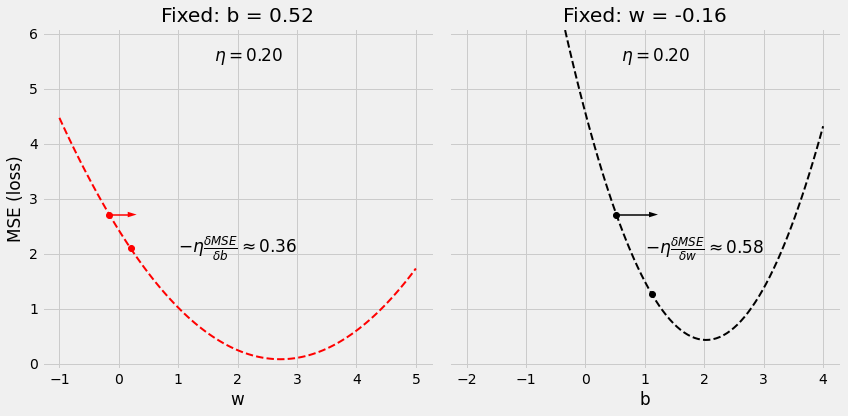

In [24]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2
figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

What would have happened if we had used a **high** learning rate instead, say, a **step size of 0.8**? As we can see in the plots below, we start to, literally, **run into trouble**.

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

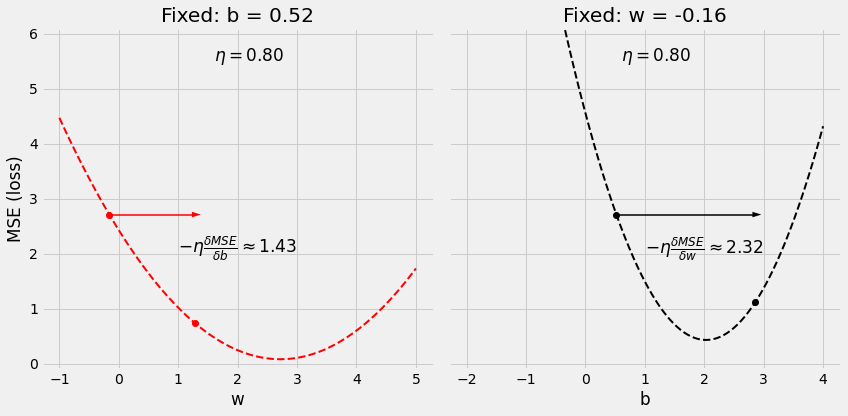

In [25]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8
figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

Even though everything is still OK on the left plot, the right plot shows us a completely different picture: **We ended up on the other side of the curve**. That is *_not_* good... You'd be going **back and forth**,  alternately hitting both sides of the curve.

"*Well, even so, I may **still** reach the minimum; why is it so bad?*"

In our simple example, yes, you'd eventually reach the minimum because the **curve is nice and round**. 

But, in real problems, the "curve" has a really **weird shape** that allows for **bizarre outcomes**, such as going back and forth **without ever approaching the minimum**.

---

For weird loss landscapes, check [Visualizing the Loss Landscape of Neural Nets](https://github.com/tomgoldstein/loss-landscape).

---

#### Very High Learning Rate

Wait, it may get **worse** than that! Let's use a **really high learning rate**, say, a **step size of 1.1**!

(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='MSE (loss)'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b'>],
       dtype=object))

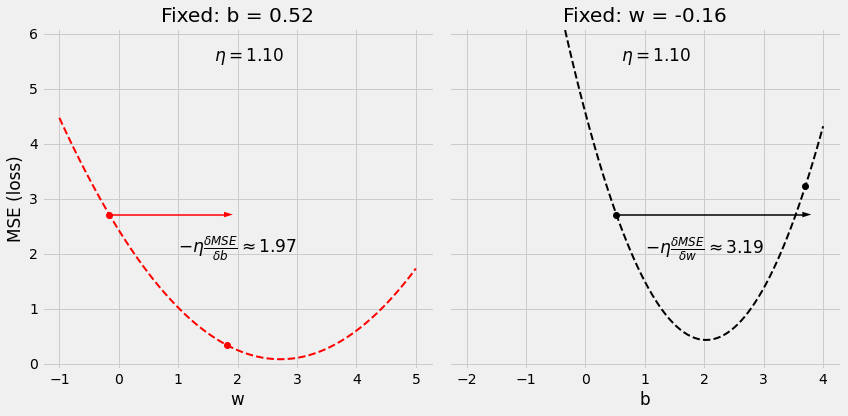

In [26]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

Ok, that *_is_* bad. On the right plot, not only did we end up on the _other side of the curve_ again, but we actually **climbed up**. This means **our loss increased**, instead of decreased! How is that even possible? *You're moving so fast downhill that you end up climbing it back up*?!

First, notice that everything is _fine_ on the left plot. The _enormous learning rate_ **did not cause any issues**, because the left curve is **less steep** than the one on the right. In other words, the curve on the left **can take higher learning rates** than the curve on the right.

What can we learn from it?

**Too high**, for a **learning rate**, is a relative concept: It depends on **how steep** the curve is, or, in other words, it depends on **how large the gradient is**.

We do have *many curves*, *many gradients*: one for each parameter. But we only have **one single learning rate** to choose (sorry, that's the way it is!). 

It means that the **size of the learning rate is limited by the steepest curve**. All other curves must follow suit, meaning they'd be using a _suboptimal_ learning rate, given their shapes.

The reasonable conclusion is: It is **best** if all the **curves are equally steep**, so the **learning rate** is closer to optimal for all of them!

---

<h2><b><i>"Choose your learning rate wisely..."</b></i></h2>

<h3><i><b>The learning rate is the single most important hyper-parameter to tune when you are using Deep Learning models!</b></i></h3>

What happens if I choose the learning rate **poorly**? Your model may **take too long to train** or **get stuck with a high loss** or, even worse, **diverge into an exploding loss**!

![](https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/learning_rates.png)

---

# Exercise #2.2

#### "Bad" Feature

How do we achieve *equally steep curves*? I'm on it! First, let's take a look at a _slightly modified_ example, which I am calling the "bad" dataset:

* I **multiplied our feature (_x_) by 10**, so it is in the range [0, 10] now, and renamed it `bad_x`.
* But since I **do not want the labels (_y_) to change**, I **divided the original `true_w` parameter by 10** and renamed it `bad_w`—this way, both `bad_w * bad_x` and `w * x` yield the same results.


In [27]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still
# the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [28]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before,
# but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

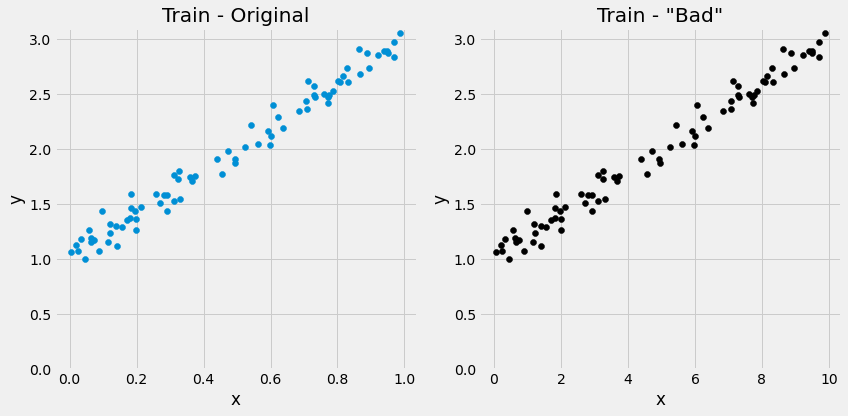

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [30]:
# The ranges CHANGED because we are centering at the new minimum, using "bad" data
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

The **only** difference between the two plots is the **scale of feature _x_**. Its range was [0, 1], now it is [0, 10]. The label _y_ hasn't changed, and I did not touch `true_b`.

Does this simple **scaling** have any meaningful impact on our gradient descent? Well, if it hadn't, I wouldn't be asking it, right? Let's compute a new **loss surface** and compare to the one we had before.


(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Loss Surface - Before'}, xlabel='b', ylabel='w'>,
        <AxesSubplot:title={'center':'Loss Surface - After'}, xlabel='b', ylabel='w'>],
       dtype=object))

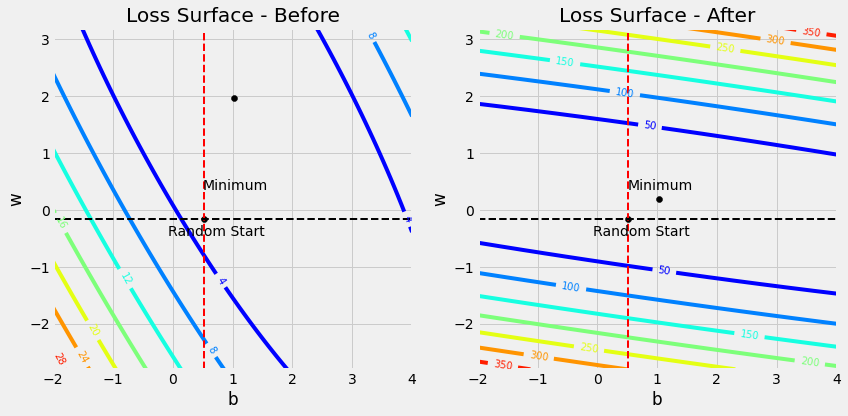

In [31]:
figure14(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

Look at the **contour values** above: The _dark blue_ line was *3.0*, and now it is *50.0*! For the same range of parameter values, **loss values are much higher**.

Let's look at the _cross-sections_ before and after we multiplied feature _x_ by 10.


(<Figure size 864x432 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Fixed: b = 0.52'}, xlabel='w', ylabel='Loss'>,
        <AxesSubplot:title={'center':'Fixed: w = -0.16'}, xlabel='b', ylabel='Loss'>],
       dtype=object))

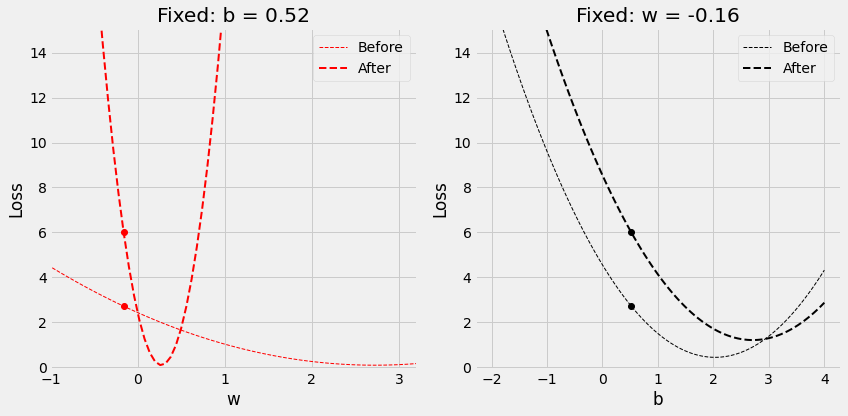

In [32]:
figure15(x_train, y_train, b_initial, w_initial, bad_bs, bad_ws, bad_x_train)

What happened here? The **red curve** got much **steeper** (larger gradient), and thus we must use a **lower learning rate** to safely descend along it.

More important, the **difference** in **steepness** between the red and the black curves **increased**. 

This is exactly what **WE NEED TO AVOID!** 

Do you remember why?

Because the **size of the learning rate is limited by the steepest curve**!

How can we fix it? Well, we _ruined_ it by **scaling it 10x larger**. Perhaps we can make it better if we **scale it in a different way**.

#### Scaling / Standardizing / Normalizing

Different how? There is this _beautiful_ thing called the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), which transforms a **feature** in such a way that it ends up with **zero mean** and **unit standard deviation**. 

How does it achieve that? First, it computes the _mean_ and the _standard deviation_ of a given **feature (_x_)** using the training set (*_N_* points):

$$
\Large
\overline{X} = \frac{1}{N}\sum_{i=1}^N{x_i}
\\
\Large
\sigma(X) = \sqrt{\frac{1}{N}\sum_{i=1}^N{(x_i - \overline{X})^2}}
\\
\Large
\text{scaled } x_i=\frac{x_i-\overline{X}}{\sigma(X)}
$$

If we were to recompute the mean and the standard deviation of the scaled feature, we would get 0 and 1, respectively. This pre-processing step is commonly referred to as *normalization*, although, technically, it should always be referred to as *standardization*.

**IMPORTANT**: Pre-processing steps like the `StandardScaler` **MUST** be performed **AFTER** the train-validation-test split; otherwise, you'll be **leaking** information from the validation and / or test sets to your model!

After using the **training set only** to fit the `StandardScaler`, you should use its `transform()` method to apply the pre-processing step to **all datasets**: training, validation, and test.

---

Let's start with the **unit standard deviation**; that is, scaling the feature values such that its **standard deviation** equals **one**. This is one of the **most important pre-processing steps**, not only for the sake of improving the performance of **gradient descent**, but for other techniques such as **principal component analysis (PCA)** as well. The **goal** is to have **all numerical features** in a **similar scale**, so the results are not affected by the original **range** of each feature.

Think of two common features in a model: _age_ and _salary_. While _age_ usually varies between 0 and 110, salaries can go from the low hundreds (say, 500) to several thousand (say, 9,000). If we compute the corresponding standard deviations, we may get values like 25 and 2,000, respectively. Thus, we need to **standardize** both features to have them on **equal footing**.

And then there is the **zero mean**; that is, **centering** the feature at **zero**. **Deeper neural networks** may suffer from a very serious condition called **vanishing gradients**. Since the gradients are used to update the parameters, smaller and smaller (that is, vanishing) gradients mean smaller and smaller updates, up to the point of a standstill: The network simply stops learning. One way to help the network to fight this condition is to **center its inputs**, the features, at **zero**. We'll get back to this later on, in the second volume of the series, while discussing _activation functions_.

---

The code below will illustrate this well.


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(x_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(x_train)
scaled_x_val = scaler.transform(x_val)

Notice that we are **not** regenerating the data—we are using the **original feature _x_** as input for the `StandardScaler` and transforming it into a **scaled _x_**. The labels (_y_) are left untouched.

Let's plot the three of them—*original*, *"bad"*, and *scaled*—side-by-side to illustrate the differences.


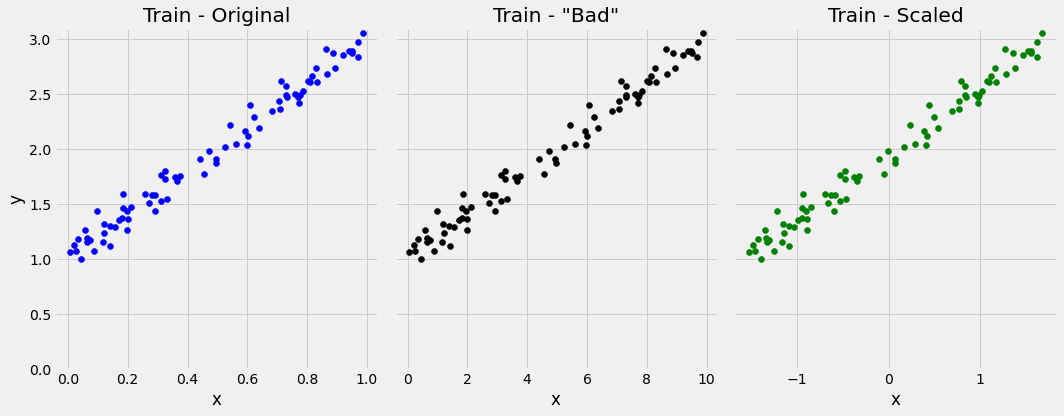

In [34]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([0, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([0, 3.1])
ax[1].set_title('Train - "Bad"')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([0, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

Once again, the **only** difference between the plots is the **scale of feature *x***. Its range was originally [0, 1], then we made it [0, 10], and now the `StandardScaler` made it [-1.5, 1.5].

OK, time to check the **loss surface**: To illustrate the differences, I am plotting the three of them side-by-side: *original*, *"bad"*, and *scaled*.


In [2]:
# The ranges CHANGED AGAIN because we are centering at the new minimum, using "scaled" data
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

NameError: name 'np' is not defined

(<Figure size 1080x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Loss Surface - Original'}, xlabel='b', ylabel='w'>,
        <AxesSubplot:title={'center':'Loss Surface - "Bad"'}, xlabel='b', ylabel='w'>,
        <AxesSubplot:title={'center':'Loss Surface - Scaled'}, xlabel='b', ylabel='w'>],
       dtype=object))

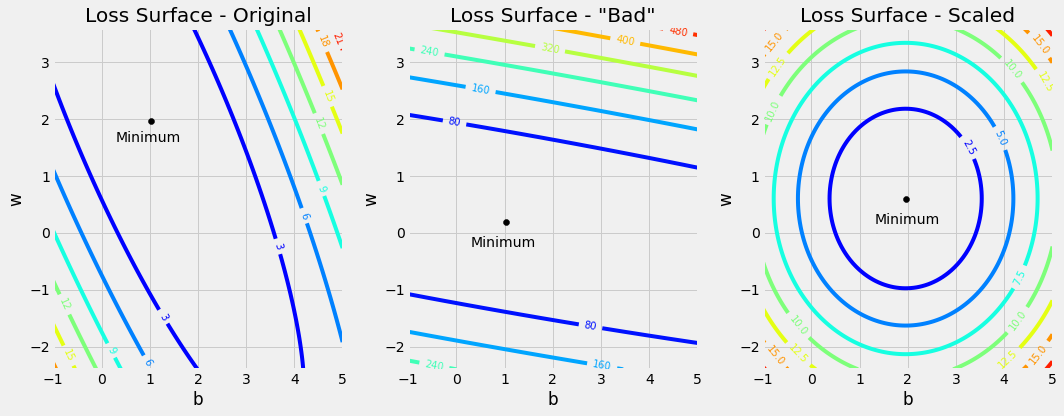

In [36]:
figure17(x_train, y_train, scaled_bs, scaled_ws, bad_x_train, scaled_x_train)

**BEAUTIFUL**, isn't it? The textbook definition of a **bowl** :-)

In practice, this is the **best surface** one could hope for: The **cross-sections** are going to be **similarly steep**, and a **good learning rate** for one of them is also good for the other. 

Sure, in the real world, you'll never get a _pretty bowl_ like that. But our conclusion still holds:

1. **Always standardize (scale) your features.**
2. **DO NOT EVER FORGET #1!**

### Step 5: Rinse and Repeat!

Now we use the **updated parameters** to go back to **Step 1** and restart the process.

Repeating this process over and over, for **many epochs**, is, in a nutshell, **training** a model.

---

An **epoch** is complete whenever **every point has been already used once for computing the loss**: 
- **batch** gradient descent: this is trivial, as it uses all points for computing the loss — **one epoch** is the same as **one update**
- **stochastic** gradient descent: **one epoch** means **N updates**
- **mini-batch** (of size n): **one epoch** has **N/n updates**

---


Let's put the previous pieces of code together and loop over many epochs:

In [37]:
# Defines number of epochs
n_epochs = 1000
lr = 0.1

# Step 0
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

for epoch in range(n_epochs):
    # Step 1
    # Computes our model's predicted output
    yhat = b + w * x_train
    
    # Step 2
    # How wrong is our model? That's the error! 
    error = (yhat - y_train)
    # It is a regression, so it computes mean squared error (MSE)
    loss = (error ** 2).mean()

    # Step 3    
    # Computes gradients for both "b" and "w" parameters
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()
    
    # Step 4
    # Updates parameters using gradients and the learning rate
    b -= lr * b_grad
    w -= lr * w_grad
    
print(b, w)

[1.02354094] [1.96896411]


Just keep in mind that, if you **don’t** use batch gradient descent (our example does), you’ll have to write an **inner loop** to perform the **four training steps** for either each **individual point** (**stochastic**) or **n points** (**mini-batch**). We’ll see a mini-batch example later down the line.

### Sanity Check

Just to make sure we haven’t done any mistakes in our code, we can use *Scikit-Learn’s Linear Regression* to fit the model and compare the coefficients.

In [38]:
# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


They **match** up to 6 decimal places — we have a *fully working implementation of linear regression* using Numpy.

### The Path of Gradient Descent

In Step 3, we have seen the **loss surface** and both random start and minimum points.

Which **path** is gradient descent going to take to go from **random start** to a **minimum**? **How long** will it take? Will it actually **reach the minimum**?

The answers to all these questions depend on many things, like the _learning rate_, the _shape of the loss surface_, and the **number of points** we use to compute the loss.

Depending on whether we use **batch**, **mini-batch**, or **stochastic** gradient descent, the path is going to be more or less **smooth**, and it is likely to reach the minimum in more or less **time**.

To illustrate the differences, I've generated paths over 100 **epochs** using either 80 data points (*batch*), 16 data points (*mini-batch*), or a single data point (*stochastic*) for computing the loss, as shown in the figure below.


![](https://raw.githubusercontent.com/dvgodoy/PyTorch101_AI_Plus/main/images/paths.png)

You can see that the resulting parameters at the end of **Epoch 1** differ greatly from one another. This is a direct consequence of the **number of updates** happening during **one epoch**, according to the batch size. In our example, for 100 epochs:

* 80 data points (*batch*): 1 update / epoch, totaling **100 updates**
* 16 data points (*mini-batch*): 5 updates / epoch, totaling **500 updates**
* 1 data point (*stochastic*): 80 updates / epoch, totaling **8,000 updates**

So, for both _center_ and _right_ plots, the **path between random start and Epoch 1** contains **multiple updates**, which are not depicted in the plot (otherwise it would be _very_ cluttered)—that's why the line connecting two epochs is **dashed**, instead of solid. In reality, there would be **zig-zagging lines** connecting every two epochs.

There are two things to notice:

* It should be no surprise that **mini-batch** gradient descent is able to get **closer to the minimum point** (using the same number of epochs) since it benefits from a _larger number of updates_ than batch gradient descent.

* The **stochastic** gradient descent path is somewhat weird: It gets quite close to the **minimum point** at the end of Epoch 1 already, but then it seems to **fail to actually reach it**. But this is _expected_ since it uses a _single data point for each update_; it will never stabilize, forever **hovering** in the neighborhood of the **minimum point**.

Clearly, there is a **trade-off** here: Either we have a **stable and smooth** trajectory, or we **move faster toward the minimum**.


## Quiz 

In [41]:
display_quiz('#./quiz/quiz2.b64')

# Exercise #2.3